In [ ]:
# Importamos las librerias

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [ ]:
# Cargamos el dataset

df = pd.read_csv("data_ML.csv")
df.head()

,Unnamed: 0,AGE,PTEDUCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,DX_SUB,DX0,DX1,DX2,PTGENDER0,PTGENDER1,PTETHCAT0,PTETHCAT1,PTETHCAT2,PTRACCAT0,PTRACCAT1,PTRACCAT2
0,0,81.3,18,1,20,1,"3,4",AD,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,67.5,10,0,27,0,"3,3",MCI,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,73.7,16,0,29,1,"3,3",CN,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,3,80.4,13,0,25,1,"3,3",MCI,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,73.9,12,1,24,1,"3,4",AD,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
# modificamos los datos

df['APOE Genotype'] = df['APOE Genotype'].str.replace(',', '.')
df['APOE Genotype'] = df['APOE Genotype'].astype(float)

In [ ]:
df.sample(4, random_state=27)


,Unnamed: 0,AGE,PTEDUCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,DX_SUB,DX0,DX1,DX2,PTGENDER0,PTGENDER1,PTETHCAT0,PTETHCAT1,PTETHCAT2,PTRACCAT0,PTRACCAT1,PTRACCAT2
609,609,85.6,20,1,27,1,3.4,MCI,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
376,376,85.3,12,0,22,0,3.3,AD,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
370,370,63.9,13,1,26,1,3.4,MCI,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
13,13,80.0,19,0,29,1,3.3,MCI,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
# Codificación de variables

encoder = LabelEncoder()
df['DX'] = encoder.fit_transform(df['DX_SUB'])


In [ ]:
# Eliminar columnas innecesarias

df = df.drop('Unnamed: 0', axis = 1)
df = df.drop('DX0', axis = 1)
df = df.drop('DX1', axis = 1)
df = df.drop('DX2', axis = 1)
df = df.drop('DX_SUB', axis = 1)

Modelo de Regresión Logística

In [ ]:
# Dividir los datos en conjunto de entrenamiento y prueba

features = df.drop('DX', axis = 1).values
target = df['DX'].values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=27)

### Entrenamiento

In [ ]:
# crear el modelo
log_clf = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000000, multi_class='multinomial')
print('Validation Accuracy = ', format(cross_val_score(log_clf, X_train, y_train, cv=5).mean(), '.2%'))

Validation Accuracy =  70.31%


In [ ]:
# testear el modelo
log_clf.fit(X_train, y_train)

print('Test Accuracy = ', format(log_clf.score(X_test, y_test), '.2%'))

Test Accuracy =  69.84%


In [ ]:
# matriz de confusión

from sklearn.metrics import confusion_matrix
y_pred = log_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14  0  4]
 [ 0 32 11]
 [11 12 42]]


In [ ]:
 # Imprimimos el reporte de regresión logística
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.78      0.65        18
           1       0.73      0.74      0.74        43
           2       0.74      0.65      0.69        65

    accuracy                           0.70       126
   macro avg       0.67      0.72      0.69       126
weighted avg       0.71      0.70      0.70       126



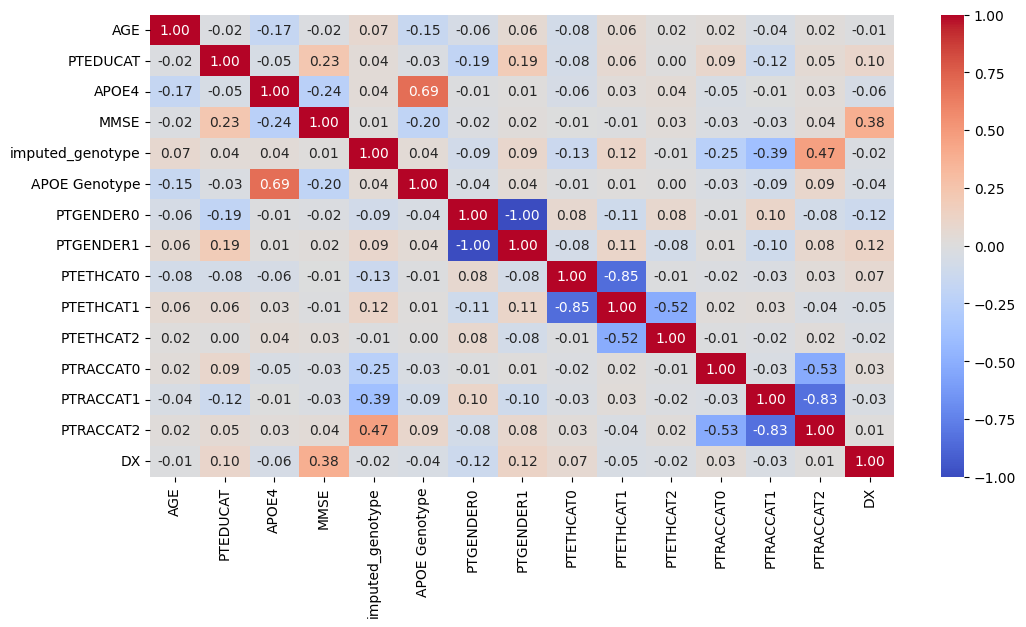

In [ ]:
# visualizar la matriz de correlacion
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

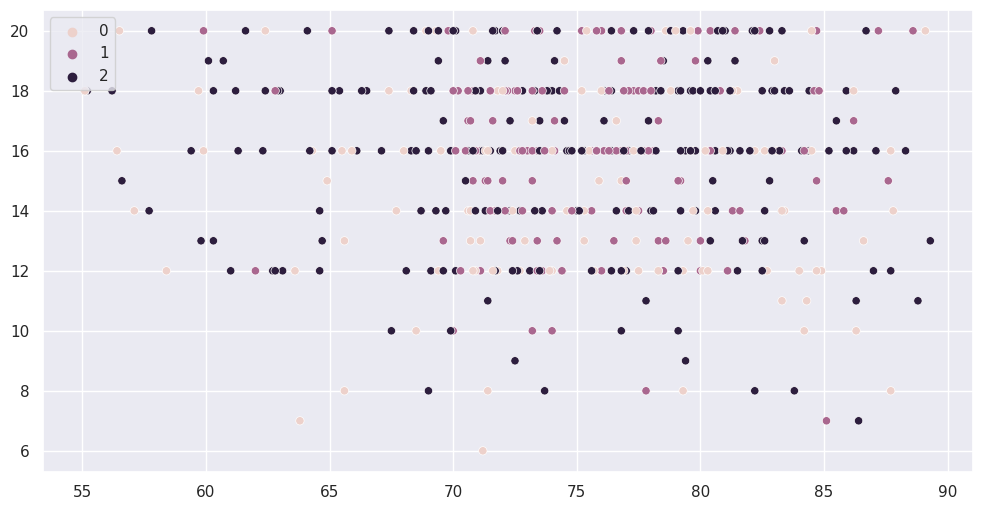

In [ ]:
# Graficar la función de regresión logística con los datos de entrenamiento

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
plt.show()


# Conclusiones y recomendaciones

En este trabajo se ha desarrollado un modelo de regresión logística para la predicción del Alzheimer. El modelo se ha entrenado y probado con un conjunto de datos de 627 pacientes.

El modelo obtuvo una precisión de prueba del 70.31%, lo que significa que tiene una probabilidad del 70.31% de predecir correctamente la clase de un nuevo dato. La precisión de entrenamiento fue ligeramente inferior (69.84%), lo que sugiere que el modelo no está sobreajustado.

Estos resultados indican que el modelo tiene una buena capacidad para predecir la enfermedad de Alzheimer. Sin embargo, es importante considerar otros factores al evaluar el rendimiento del modelo, como la distribución de los datos de prueba y el umbral de decisión utilizado para clasificar los datos.Los factores más importantes para predecir la enfermedad de Alzheimer son la edad, el genotipo APOE4, el nivel educativo y el sexo.